<a href="https://colab.research.google.com/github/multitude00999/hf_audio_course/blob/main/notebooks/unit1/load_audio_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install datasets[audio]
! pip install gradio

In [19]:
from IPython.display import Audio
from datasets import load_dataset
import gradio as gr
import librosa
import matplotlib.pyplot as plt
import librosa.display

In [21]:

minds = load_dataset("PolyAI/minds14", name="fr-FR", split="train")
minds

Generating train split: 0 examples [00:00, ? examples/s]

Dataset minds14 downloaded and prepared to /root/.cache/huggingface/datasets/PolyAI___minds14/fr-FR/1.0.0/65c7e0f3be79e18a6ffaf879a083daf706312d421ac90d25718459cbf3c42696. Subsequent calls will reuse this data.


Dataset({
    features: ['path', 'audio', 'transcription', 'english_transcription', 'intent_class', 'lang_id'],
    num_rows: 539
})

In [22]:
example = minds[0]
example

{'path': '/root/.cache/huggingface/datasets/downloads/extracted/a19fbc5032eacf25eab0097832db7b7f022b42104fbad6bd5765527704a428b9/fr-FR~ADDRESS/response_4.wav',
 'audio': {'path': '/root/.cache/huggingface/datasets/downloads/extracted/a19fbc5032eacf25eab0097832db7b7f022b42104fbad6bd5765527704a428b9/fr-FR~ADDRESS/response_4.wav',
  'array': array([ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.00048828, -0.00024414]),
  'sampling_rate': 8000},
 'transcription': 'je souhaite changer mon adresse',
 'english_transcription': 'I want to change my address',
 'intent_class': 1,
 'lang_id': 6}

In [23]:
id2label = minds.features["intent_class"].int2str
id2label(example["intent_class"])

'address'

In [24]:
Audio(data = example['audio']['array'], rate = example['audio']['sampling_rate'])

In [25]:
columns_to_remove = ["lang_id", "english_transcription"]
minds = minds.remove_columns(columns_to_remove)
minds

Dataset({
    features: ['path', 'audio', 'transcription', 'intent_class'],
    num_rows: 539
})

In [26]:
def generate_audio():
    example = minds.shuffle()[0]
    audio = example["audio"]
    return (
        audio["sampling_rate"],
        audio["array"],
    ), id2label(example["intent_class"])


with gr.Blocks() as demo:
    with gr.Column():
        for _ in range(4):
            audio, label = generate_audio()
            output = gr.Audio(audio, label=label)

demo.launch(debug=True)

/usr/local/lib/python3.10/dist-packages/gradio/processing_utils.py:171: UserWarning: Trying to convert audio automatically from float64 to 16-bit int format.
  warnings.warn(warning.format(data.dtype))


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

Keyboard interruption in main thread... closing server.


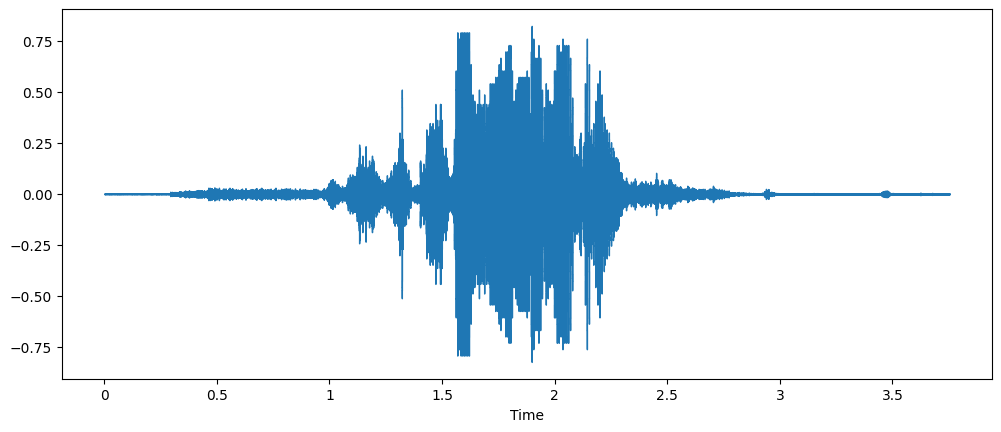

In [27]:
array = example["audio"]["array"]
sampling_rate = example["audio"]["sampling_rate"]

plt.figure().set_figwidth(12)
librosa.display.waveshow(array, sr=sampling_rate)